In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')

[2017-03-20 16:01:38,000] Making new env: FrozenLake-v0


In [8]:
tf.reset_default_graph()

In [10]:
#Feed-forward part of the network used to choose actions
x_in = tf.placeholder(shape=(1,16),dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(x_in,W)
predict = tf.argmax(Qout,1)

#Loss is a sum of square difference between the target and prediction Q value
nextQ = tf.placeholder(shape=(1,4),dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [11]:
init = tf.global_variables_initializer()

#Set learning parameters
gamma = 0.99
epsilon = 0.1
num_episodes = 4000
#Create lists to contain total rewards and steps per episode
rList = []
jList = []
with tf.Session() as sess:
    sess.run(init)
    for i in xrange(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j += 1
            #Choose an action greedily with some randomness, from Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={x_in:np.identity(16)[s:s+1]})
            if np.random.rand(1) < epsilon:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1, r, d, _ = env.step(a[0])
            #Obtain the Q values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={x_in:np.identity(16)[s1:s1+1]})
            #Obtain maxQ and set our target value for chosen action
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + gamma*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={x_in:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model
                epsilon = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: {0} %".format(str(sum(rList)/num_episodes)))
    

Percent of succesful episodes: 0.5325 %


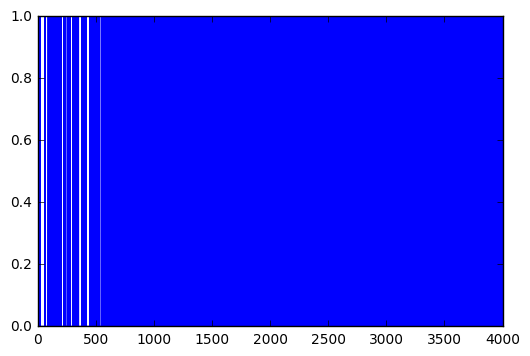

In [12]:
plt.plot(rList)

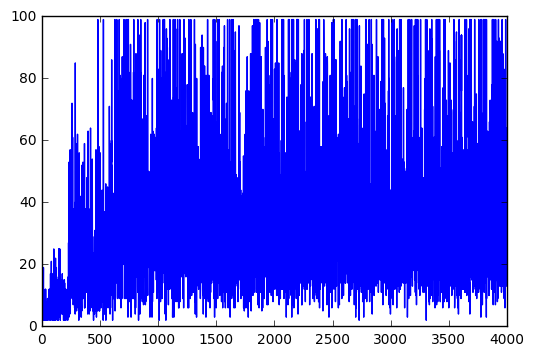

In [13]:
plt.plot(jList)